[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data with Closing Prices:
            ^GSPC_CLOSE  NVDA_CLOSE
Date                               
2019-01-01  2704.100098     3.59375
2019-02-01  2784.489990     3.85650
2019-03-01  2834.399902     4.48900
2019-04-01  2945.830078     4.52500
2019-05-01  2752.060059     3.38650

Data with Monthly Returns:
            ^GSPC_CLOSE  NVDA_CLOSE  ^GSPC_RETURN  NVDA_RETURN
Date                                                          
2019-02-01  2784.489990     3.85650      0.029729     0.073113
2019-03-01  2834.399902     4.48900      0.017924     0.164009
2019-04-01  2945.830078     4.52500      0.039313     0.008020
2019-05-01  2752.060059     3.38650     -0.065778    -0.251602
2019-06-01  2941.760010     4.10575      0.068930     0.212387


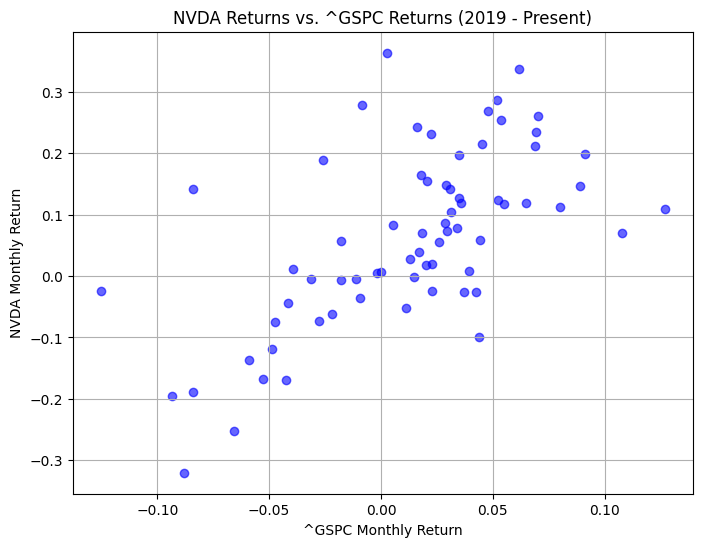


Alpha (excess return): 0.0401
Beta (market sensitivity): 1.7671

Number of months NVDA outperformed the market: 45
Number of months NVDA underperformed the market: 24

Top 10 performing months for NVDA:
            NVDA_RETURN
Date                   
2023-05-01     0.363436
2023-01-01     0.336869
2024-02-01     0.285809
2021-11-01     0.278054
2024-05-01     0.268871
2020-08-01     0.259992
2022-11-01     0.253834
2024-01-01     0.242418
2021-10-01     0.234167
2021-06-01     0.231340

Top 10 performing months for the S&P 500 (^GSPC):
            ^GSPC_RETURN
Date                    
2020-04-01      0.126844
2020-11-01      0.107546
2022-07-01      0.091116
2023-11-01      0.089179
2022-10-01      0.079863
2020-08-01      0.070065
2021-10-01      0.069144
2019-06-01      0.068930
2023-06-01      0.064727
2023-01-01      0.061753


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (a) Pull data and create df_q1 with columns ^NVDA_CLOSE and ^GSPC_CLOSE
start_date = '2019-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Downloading data for ^GSPC and NVDA
gspc_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1mo')['Close']
nvda_data = yf.download('NVDA', start=start_date, end=end_date, interval='1mo')['Close']

# Creating DataFrame with both tickers
df_q1 = pd.DataFrame({
    '^GSPC_CLOSE': gspc_data,
    'NVDA_CLOSE': nvda_data
})


print("Data with Closing Prices:")
print(df_q1.head())

# (b) Compute monthly returns for the two tickers and add them to df_q1
df_q1['^GSPC_RETURN'] = df_q1['^GSPC_CLOSE'].pct_change()
df_q1['NVDA_RETURN'] = df_q1['NVDA_CLOSE'].pct_change()

# Drop rows with NaN values (first row and any missing data)
df_q1.dropna(inplace=True)

# Display the first few rows after adding returns
print("\nData with Monthly Returns:")
print(df_q1.head())

# (c) Create a scatter plot of NVDA returns against ^GSPC returns
plt.figure(figsize=(8, 6))
plt.scatter(df_q1['^GSPC_RETURN'], df_q1['NVDA_RETURN'], color='blue', alpha=0.6)
plt.title('NVDA Returns vs. ^GSPC Returns (2019 - Present)')
plt.xlabel('^GSPC Monthly Return')
plt.ylabel('NVDA Monthly Return')
plt.grid(True)
plt.show()

# (d) Calculate the beta and alpha of NVDA over the period
beta, alpha = np.polyfit(df_q1['^GSPC_RETURN'], df_q1['NVDA_RETURN'], 1)

print(f"\nAlpha (excess return): {alpha:.4f}")
print(f"Beta (market sensitivity): {beta:.4f}")

# (e) Calculate the number of months NVDA outperformed and underperformed the market
df_q1['Outperformed'] = df_q1['NVDA_RETURN'] > df_q1['^GSPC_RETURN']

num_outperform = df_q1['Outperformed'].sum()
num_underperform = (~df_q1['Outperformed']).sum()

print(f"\nNumber of months NVDA outperformed the market: {num_outperform}")
print(f"Number of months NVDA underperformed the market: {num_underperform}")

# (f) Top 10 performing months for NVDA and the market
top_nvda = df_q1.nlargest(10, 'NVDA_RETURN')
top_gspc = df_q1.nlargest(10, '^GSPC_RETURN')

print("\nTop 10 performing months for NVDA:")
print(top_nvda[['NVDA_RETURN']])

print("\nTop 10 performing months for the S&P 500 (^GSPC):")
print(top_gspc[['^GSPC_RETURN']])
